In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [2]:
camera = 1
original_scale = (3840, 2160)
display_scale = (1920, 1080)

scale_ratio = original_scale[0] / display_scale[0]

In [3]:
image = cv2.imread(f'../extrinsic_calibration_images/out{camera}.png')

In [17]:
# function to display the coordinates of 
# of the points clicked on the image  
def click_event(event, x, y, flags, params): 
  
    # checking for left mouse clicks 
    if event == cv2.EVENT_LBUTTONDOWN: 
  
        # displaying the coordinates 
        # on the Shell 
        global point
        point = np.array([int(scale_ratio * x), int(scale_ratio * y), 1])
        print(point) 
  
        # displaying the coordinates 
        # on the image window 
        font = cv2.FONT_HERSHEY_SIMPLEX 
        imS = cv2.resize(image, display_scale)
        cv2.putText(imS, str(point[0]) + ',' +
                    str(point[1]), (x,y), font, 
                    1, (255, 0, 0), 2)
        cv2.imshow('image', imS) 

In [5]:
imS = cv2.resize(image, display_scale) 
cv2.imshow('image', imS)
# setting mouse handler for the image and calling the click_event() function 
cv2.setMouseCallback('image', click_event) 
cv2.waitKey(0)
cv2.destroyAllWindows()


[2013 1635    1]


In [6]:
homography_matrix = np.load(f'../homography_matrices/{camera}.npy')
world_point = np.dot(homography_matrix, point)
world_point = world_point / world_point[2]

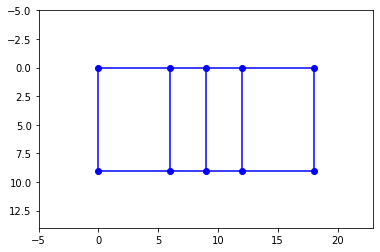

In [31]:
# plot the court
plt.scatter([0, 0, 6, 6, 9, 9, 12, 12, 18, 18], [0, 9, 0, 9, 0, 9, 0, 9, 0, 9], color='blue')
plt.plot([0, 0], [0, 9], 'blue')
plt.plot([6, 6], [0, 9], 'blue')
plt.plot([9, 9], [0, 9], 'blue')
plt.plot([12, 12], [0, 9], 'blue')
plt.plot([18, 18], [0, 9], 'blue')
plt.plot([0, 18], [0, 0], 'blue')
plt.plot([0, 18], [9, 9], 'blue')

# plot the point
#plt.scatter(world_point[0], world_point[1], color='red')

plt.xlim((-5, 23))
plt.ylim((-5, 14))

# invert the y axis so origin is in top left corner
plt.gca().invert_yaxis()

#plt.axis('equal')
plt.savefig('../images/court.png', dpi=400)


In [8]:
# loop over other images - try to find point
homographies = {
    '1': np.load('../homography_matrices/1.npy'),
    '2': np.load('../homography_matrices/2.npy'),
    '3': np.load('../homography_matrices/3.npy'),
    '4': np.load('../homography_matrices/4.npy'),
    '5': np.load('../homography_matrices/5.npy'),
    '6': np.load('../homography_matrices/6.npy'),
    '7': np.load('../homography_matrices/7.npy'),
    '8': np.load('../homography_matrices/8.npy'),
    '12': np.load('../homography_matrices/12.npy'),
    '13': np.load('../homography_matrices/13.npy')
}


In [9]:
for camera in homographies.keys():
    image_point = np.dot(np.linalg.inv(homographies[camera]), world_point)
    image_point = (image_point / image_point[2])[:2]
    
    if 0 < image_point[0] < original_scale[0] and 0 < image_point[1] < original_scale[1]:
        image2 = cv2.imread(f'../extrinsic_calibration_images/out{camera}.png')
        cv2.circle(image2, image_point.astype(int), 15, (0, 0, 255), 3)
        im2 = cv2.resize(image2, display_scale) 
        cv2.imshow(f'Camera {camera}', im2)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print(f'Camera {camera} does not see this point.')
    

Camera 4 does not see this point.


In [10]:
# # find point in other images 
# homography_2 = np.load('../homography_matrices/2.npy')
# image_point = np.dot(np.linalg.inv(homography_2), world_point)
# image_point = (image_point / image_point[2])[:2]

# if image_point[0] < original_scale[0] and image_point[1] < original_scale[1]:
#     image2 = cv2.imread(f'../extrinsic_calibration_images/out2.png')
#     cv2.circle(image2, image_point.astype(int), 10, (0, 0, 255), 2)
#     im2 = cv2.resize(image2, display_scale) 
#     cv2.imshow('image', im2)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

In [11]:
# # find point in other images 
# homography_3 = np.load('../homography_matrices/3.npy')
# image_point = np.dot(np.linalg.inv(homography_3), world_point)
# image_point = (image_point / image_point[2])[:2]

# if image_point[0] < original_scale[0] and image_point[1] < original_scale[1]:
#     image2 = cv2.imread(f'../extrinsic_calibration_images/out3.png')
#     cv2.circle(image2, image_point.astype(int), 10, (0, 0, 255), 2)
#     im2 = cv2.resize(image2, display_scale) 
#     cv2.imshow('image', im2)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

In [19]:
def display_grid():
    img1 = cv2.imread(f'../extrinsic_calibration_images/out1.png')
    img2 = cv2.imread(f'../extrinsic_calibration_images/out2.png')
    img3 = cv2.imread(f'../extrinsic_calibration_images/out3.png')
    img4 = cv2.imread(f'../extrinsic_calibration_images/out4.png')
    img5 = cv2.imread(f'../extrinsic_calibration_images/out5.png')
    img6 = cv2.imread(f'../extrinsic_calibration_images/out6.png')
    img7 = cv2.imread(f'../extrinsic_calibration_images/out7.png')
    img8 = cv2.imread(f'../extrinsic_calibration_images/out8.png')
    img12 = cv2.imread(f'../extrinsic_calibration_images/out12.png')
    img13 = cv2.imread(f'../extrinsic_calibration_images/out13.png')

    court = np.zeros_like(img1)

    # concatenate images horizontally 
    row1 = np.concatenate((img1, img2, img3, img4), axis=1) 
    row2 = np.concatenate((img5, img6, court, court), axis=1)
    row3 = np.concatenate((img7, img8, court, court), axis=1)
    row4 = np.concatenate((img12, img13, court, court), axis=1)
  
    # concatenate images vertically 
    cluster = np.concatenate((row1, row2, row3, row4), axis=0) 

    # display
    cv2.namedWindow('cluster', cv2.WINDOW_NORMAL)
    cv2.setWindowProperty('cluster', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
    
    cluster_rs = cv2.resize(cluster, display_scale)
    cv2.imshow('cluster', cluster_rs) 
    
    

In [20]:
def click_grid(event, x, y, flags, params): 
    # checking for left mouse clicks 
    if event == cv2.EVENT_LBUTTONDOWN: 
        # displaying the coordinates 
        # on the Shell 
        global point
        point = np.array([int(scale_ratio * x), int(scale_ratio * y), 1])
        print(point) 
        return point
  
        # # displaying the coordinates 
        # # on the image window 
        # font = cv2.FONT_HERSHEY_SIMPLEX 
        # imS = cv2.resize(image, display_scale)
        # cv2.putText(imS, str(point[0]) + ',' +
        #             str(point[1]), (x,y), font, 
        #             1, (255, 0, 0), 2)
        # cv2.imshow('image', imS)

In [15]:
def enlarge_grid_image():
    small_width = display_scale[0] / 4
    small_height = display_scale[1] / 4
    x = point[0]
    y = point[1]
    
    if x < small_width:
        # 1, 5, 7, 12
        if y < small_height:
            return 1
        elif y < 2 * small_height:
            return 5
        elif y < 3 * small_height:
            return 7
        else:
            return 12
    elif x < 2 * small_width:
        # 2, 6, 8, 13
        if y < small_height:
            return 2
        elif y < 2 * small_height:
            return 6
        elif y < 3 * small_height:
            return 8
        else:
            return 13
    elif x < 3 * small_width:
        # 3 or error
        if y < small_height:
            return 3
    else:
        # 4 or error
        if y < small_height:
            return 4

In [16]:
def display_enlarged_image(camera):
    cv2.namedWindow('image', cv2.WINDOW_NORMAL)
    cv2.setWindowProperty('image', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
    image = cv2.imread(f'../extrinsic_calibration_images/out{camera}.png')
    imS = cv2.resize(image, display_scale) 
    cv2.imshow('image', imS)

In [21]:
display_grid()
cv2.setMouseCallback('cluster', click_grid) 
cv2.waitKey(0) 

camera = enlarge_grid_image()
display_enlarged_image(camera)
cv2.setMouseCallback('image', click_event) 
cv2.waitKey(0) 

cv2.destroyAllWindows() 

[480 336   1]
[ 278 1638    1]


NameError: name 'image' is not defined